# Tasks

## Task 1: Permutations and Combinations


In this notebook, we'll explore a modified version of the famous Lady Tasting Tea experiment, originally designed by Sir Ronald Fisher [1]. We'll use the approach demonstrated in the lecture, applying it to our scenario with twelve cups of tea instead of eight. This problem also draws from David Salsburg's popular explanation of how statistics revolutionized science [2].

### Task:  

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

### Setup

In [18]:
# Mathematical functions from the standard library.
import math

# Permutations and combinations.
import itertools

# Random selections.
import random

# Numerical structures and operations.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Total number of cups
no_cups = 12
# Number of cups with milk first
no_cups_milk_first = 6

### Calculating Combinations

Let's calculate the number of ways to choose the milk-first cups, using the math.comb() function:

In [19]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

print(f"Number of ways to select {no_cups_milk_first} cups from {no_cups}: {ways}")

Number of ways to select 6 cups from 12: 924


### Generating All Possible Combinations

Now, let's generate all possible combinations, similar to the approach in the lecture:

In [20]:
# The cup labels.
labels = list(range(no_cups))

# Show all the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

print(f"First 5 combinations: {combs[:5]}")
print(f"Total number of combinations: {len(combs)}")

First 5 combinations: [(0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 6), (0, 1, 2, 3, 4, 7), (0, 1, 2, 3, 4, 8), (0, 1, 2, 3, 4, 9)]
Total number of combinations: 924


This confirms our calculation and shows us what the combinations look like.

### Simulating the Experiment

Let's simulate the experiment by randomly selecting cups, as done in the lecture:

In [21]:
# Select six cups at random to put milk in first.
labels_milk = random.sample(labels, no_cups_milk_first)

# Sort, inplace.
labels_milk.sort()

print(f"Randomly selected cups with milk first: {labels_milk}")

Randomly selected cups with milk first: [0, 1, 3, 4, 8, 9]


This represents our "true" setup for the experiment - these are the cups that actually have milk added first.

### Calculating Overlaps

Now, let's calculate the overlaps between each possible combination and our "true" setup:

In [22]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
    # Turn comb and labels_milk into sets.
    s1 = set(comb)
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

# Count the number of times each overlap occurs.
unique, counts = np.unique(no_overlaps, return_counts=True)

print("Number of correct guesses : Frequency")
for u, c in zip(unique, counts):
    print(f"{u} : {c}")

Number of correct guesses : Frequency
0 : 1
1 : 36
2 : 225
3 : 400
4 : 225
5 : 36
6 : 1


### Visualizing the Results

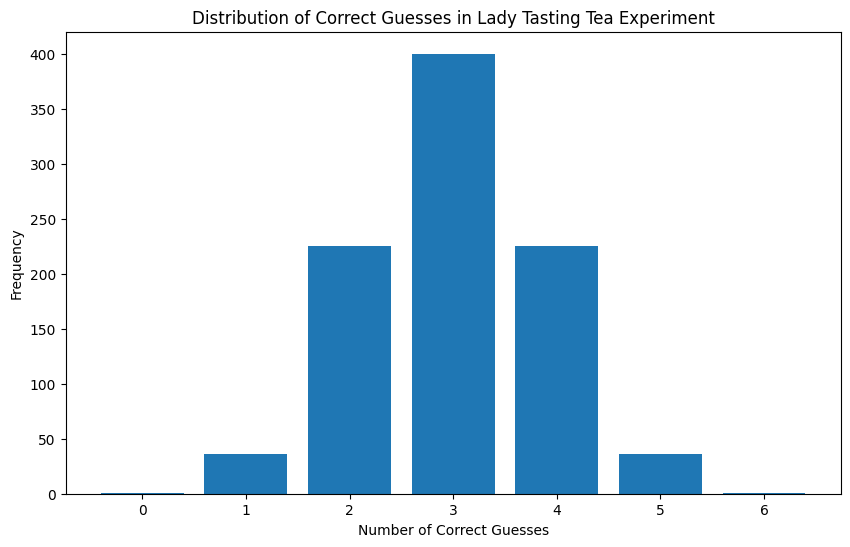

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(unique, counts)
ax.set_xlabel('Number of Correct Guesses')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Correct Guesses in Lady Tasting Tea Experiment')
plt.show()

### Calculating Probabilities

Let's calculate the probabilities of different outcomes:

In [24]:
total_combinations = sum(counts)

print(f"Probability of guessing all 6 correctly: {1 / total_combinations:.6f}")
print(f"Probability of guessing at least 5 correctly: {(counts[-1] + counts[-2]) / total_combinations:.6f}")
print(f"Probability of guessing at least 4 correctly: {sum(counts[-3:]) / total_combinations:.6f}")

Probability of guessing all 6 correctly: 0.001082
Probability of guessing at least 5 correctly: 0.040043
Probability of guessing at least 4 correctly: 0.283550


### Interpretation and Conclusion

1. The probability of guessing all 6 cups correctly is very low (about 0.1%), which aligns with our earlier calculation using math.comb().

2. The probability of guessing at least 5 correctly is about 4%, which is still quite low. If someone achieved this level of accuracy, it would be surprising if they were guessing randomly.

3. The probability of guessing at least 4 correctly is about 28.4%. This is much higher and could more reasonably occur by chance.

These results demonstrate how increasing the number of cups from 8 to 12 affects the probabilities. It becomes even more unlikely to guess all cups correctly by chance, but also more likely to guess a majority correctly just by luck.
As in Fisher's original experiment, this analysis helps us quantify how surprised we should be by different outcomes, forming the basis for statistical decision-making.

## Task 2: numpy's Normal Distribution

For Task 2; we assess whether numpy.random.normal() accurately generates normally distributed values. This includes generating a large sample, testing it statistically, and inspecting it visually.

### Task:

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

### Step 1: Importing Libraries

First, we import the necessary libraries:

- Numpy for generating the sample data.
- Matplotlib for plotting visualizations.
- Scipy for statistical testing.
These tools will help us analyze and visualize the normality of the generated sample.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


### Step 2: Generating the Sample

We generate a sample with a mean (
𝜇
μ) of 10, a standard deviation (
𝜎
σ) of 3, and a size of 100,000 values. This large sample size gives us a reliable distribution for analysis.

We also set a random seed to ensure that the results are reproducible.

In [26]:
# Setting parameters
np.random.seed(42)  # for reproducibility
mean, std, size = 10.0, 3.0, 100000
data = np.random.normal(loc=mean, scale=std, size=size)


### Step 3: Basic Statistics

To validate our sample, we calculate its mean and standard deviation. These values should ideally be close to the parameters we specified ( 𝜇 = 10 μ=10 and 𝜎 = 3 σ=3).

Explanation:

- The mean and standard deviation should closely match the values we set. Small deviations are normal due to the randomness in data generation, but large discrepancies might indicate issues with the sample generation process.

In [27]:
print("### Basic Statistics of the Generated Sample")
print(f"Sample Mean: {np.mean(data):.4f} (Expected: 10.0)")
print(f"Sample Std Dev: {np.std(data):.4f} (Expected: 3.0)")


### Basic Statistics of the Generated Sample
Sample Mean: 10.0029 (Expected: 10.0)
Sample Std Dev: 3.0027 (Expected: 3.0)


### Step 4: Shapiro-Wilk Test for Normality

The Shapiro-Wilk test is a formal statistical test that checks if a dataset follows a normal distribution. Here:

- The null hypothesis (H0) states that the sample is normally distributed.
- A p-value greater than 0.05 indicates that we do not reject H0, suggesting the sample is likely normal.

Explanation:

- For very large samples, the test might issue a warning due to its sensitivity at high values (N > 5000). Nonetheless, a high p-value and a test statistic close to 1 indicate that our sample is likely normal. (SciPy Documentation, 2023).

In [28]:
# Perform the Shapiro-Wilk test
stat, p_value = stats.shapiro(data)
print("\n### Shapiro-Wilk Test Results")
print(f"Test Statistic: {stat:.6f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
if p_value > 0.05:
    print("Interpretation: Fail to reject the null hypothesis; the sample appears to follow a normal distribution.")
else:
    print("Interpretation: Reject the null hypothesis; the sample may not follow a normal distribution.")



### Shapiro-Wilk Test Results
Test Statistic: 0.999991
p-value: 0.999830
Interpretation: Fail to reject the null hypothesis; the sample appears to follow a normal distribution.


### Step 5: Visual Inspection - Histogram and PDF Overlay

To visually confirm the sample’s normality, we plot a histogram of the generated data. Additionally, we overlay the theoretical normal distribution’s probability density function (PDF) with the same mean and standard deviation as our sample.

The probability density function (PDF) for a normal distribution is a mathematical expression that defines the likelihood of different values in a dataset. When sample data is approximately normal, it should align closely with the PDF curve, providing a visual and statistical confirmation of normality.  (Weisstein, 2023).

Explanation:

- The histogram should resemble the bell shape of the theoretical PDF line if the sample is normally distributed.
- Visual inspection complements the statistical test, giving us confidence in the normality of the sample.

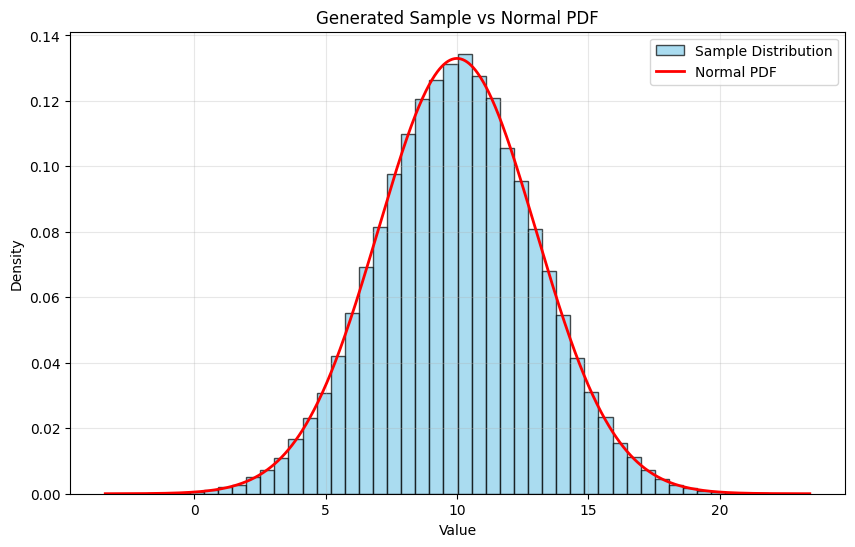

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram of the sample
ax.hist(data, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Sample Distribution')

# Overlay the theoretical normal PDF
x = np.linspace(data.min(), data.max(), 1000)
pdf = stats.norm.pdf(x, loc=10.0, scale=3.0)
ax.plot(x, pdf, 'r-', lw=2, label='Normal PDF')

# Formatting the plot
ax.set_title('Generated Sample vs Normal PDF')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()


### Summary and Interpretation
The results from both statistical and visual inspections indicate that:

- The sample’s mean and standard deviation closely match our expectations, aligning with the normal distribution parameters we set.
- The Shapiro-Wilk test’s high p-value suggests that the data likely follows a normal distribution.
- The histogram and theoretical PDF overlay confirm that the sample data shape visually resembles a normal distribution.

Together, these results confirm that numpy.random.normal() produces values that follow a normal distribution, validating its reliability for simulating normally distributed data.

## Task 3: t-Test Calculation

## Task 4: ANOVA

## References

[1] Fisher, R. A. (1935). The Design of Experiments. Edinburgh: Oliver and Boyd.

[2] Salsburg, D. (2001). The Lady Tasting Tea: How Statistics Revolutionized Science in the Twentieth Century. New York: W. H. Freeman.

[3] SciPy Documentation. (2023). Shapiro-Wilk Test. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[4] Weisstein, E. W. (2023). Normal Distribution. MathWorld – A Wolfram Web Resource. Available at: https://mathworld.wolfram.com/NormalDistribution.html
